In [261]:
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [263]:
Datos = pd.read_csv('./Titanic-Dataset.csv')


In [265]:

Datos.head(40)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [267]:
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [269]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [273]:
Datos.drop([889,890],inplace=True)

In [277]:
Datos.isnull().tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
884,False,False,False,False,False,False,False,False,False,False,True,False
885,False,False,False,False,False,False,False,False,False,False,True,False
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

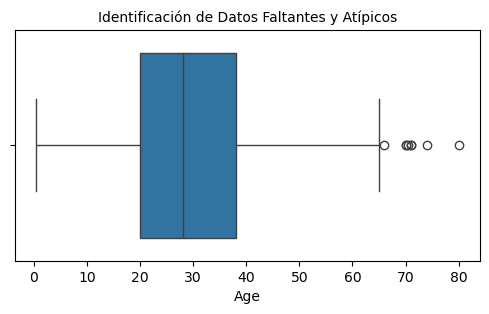

In [299]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [289]:

print("Cantidad de Registros con cero en Cabin: ",Datos['Cabin'].isin([0]).sum())
print("Cantidad de Registros con cero en Age: ",Datos['Age'].isin([0]).sum())

Cantidad de Registros con cero en Cabin:  0
Cantidad de Registros con cero en Age:  0


<Axes: >

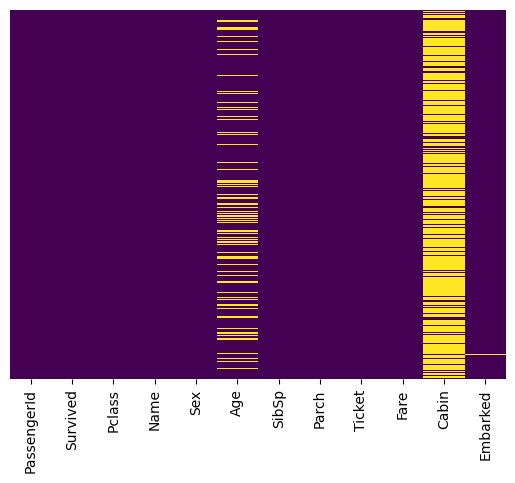

In [285]:
sns.heatmap(Datos.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [355]:
nivel_minimo=20
nivel_maximo=800
Total_Atipicos=((Datos['Age']<nivel_minimo)|(Datos['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [305]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 533 entries, 0 to 886
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  533 non-null    int64  
 1   Survived     533 non-null    int64  
 2   Pclass       533 non-null    int64  
 3   Name         533 non-null    object 
 4   Sex          533 non-null    object 
 5   Age          533 non-null    float64
 6   SibSp        533 non-null    int64  
 7   Parch        533 non-null    int64  
 8   Ticket       533 non-null    object 
 9   Fare         533 non-null    float64
 10  Cabin        155 non-null    object 
 11  Embarked     531 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 54.1+ KB


<Axes: >

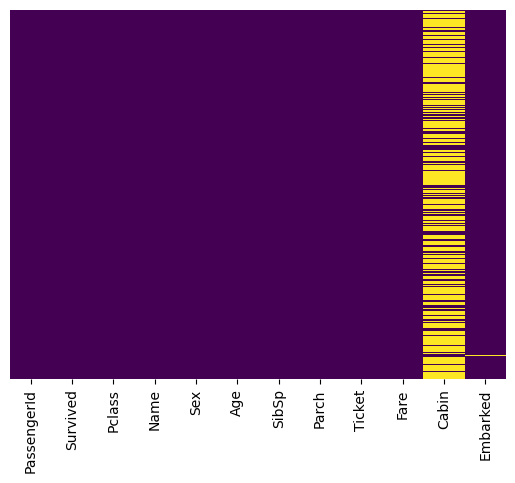

In [321]:
sns.heatmap(Datos.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [385]:

features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']
Datos = Datos[features + ['Survived']]

KeyError: "['Age', 'SibSp', 'Parch', 'Fare'] not in index"

In [387]:
Datos['Survived'].value_counts()

Survived
0    326
1    207
Name: count, dtype: int64

In [369]:
Datos[['Survived']].head(40)

,Survived
0,0
1,1
2,1
3,1
4,0
6,0
8,1
11,1
13,0
15,1


In [389]:
Datos = pd.get_dummies(Datos, columns=['Sex'], drop_first=True)

In [391]:
X = Datos.drop('Survived',axis=1) # Se cargan los datos de train sin los datos de la columna Diabetico 
Y = Datos['Survived'] # Se cargan los datos de train con los datos de la la columna Diabetico

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [393]:
print (X_train)

     PassengerId  Pclass  Sex_male
736          737       3     False
41            42       2     False
323          324       2     False
659          660       1      True
56            57       2     False
..           ...     ...       ...
695          696       2      True
620          621       3      True
551          552       2      True
259          260       2     False
512          513       1      True

[399 rows x 3 columns]


In [395]:
print (Y_train)

736    0
41     0
323    1
659    0
56     1
      ..
695    0
620    0
551    0
259    1
512    1
Name: Survived, Length: 399, dtype: int64


In [397]:
modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test)

In [399]:
print (Y_test)

590    0
482    0
516    1
452    0
1      1
      ..
93     0
222    0
501    0
582    0
178    0
Name: Survived, Length: 134, dtype: int64


In [401]:

print (Prediccion)

[0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0
 0 1 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0]


In [403]:
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        82
           1       0.85      0.75      0.80        52

    accuracy                           0.85       134
   macro avg       0.85      0.83      0.84       134
weighted avg       0.85      0.85      0.85       134



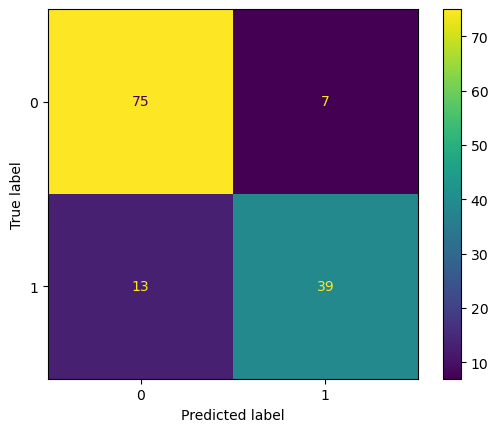

In [405]:
cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

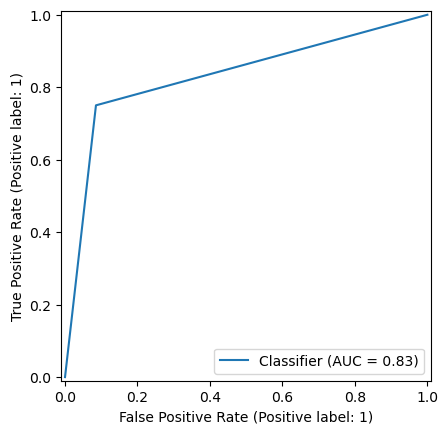

In [407]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_12200\1900813149.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=Datos,palette='viridis')


<Axes: xlabel='Survived', ylabel='count'>

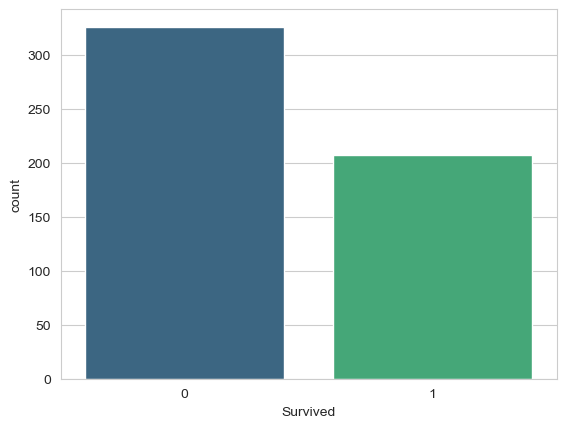

In [423]:
sns.set_style('whitegrid') 
sns.countplot(x='Survived',data=Datos,palette='viridis')


<Axes: xlabel='Survived', ylabel='count'>

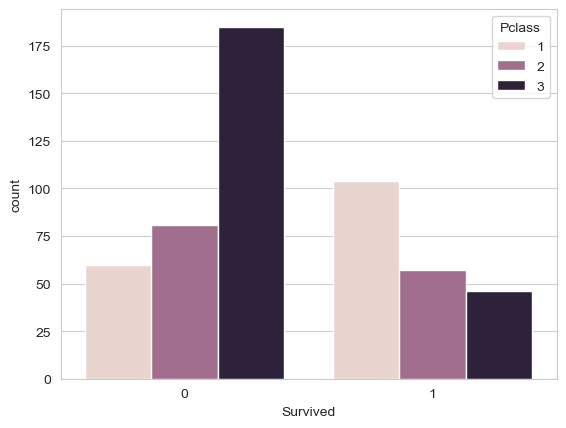

In [433]:
sns.countplot(x='Survived',hue='Pclass',data=Datos)

In [439]:
#ANALISIS :
#-Identifica la grafica cuantos supervivientes se evidencian y fueron menos los que sobrevivieron aproximadamente 210 y los que no sobrevivieron aproximadamente 350
#-En relacion a los sobrevicientes con las clase social ,la mayoria de personas que perdieron la vida pertenencen a las 3°clase y las personas que mas sobrevivieron son de la 1°clase
#-En la Matriz de confusion :
#*verdaderos negativos ,correctamente como falso 75
#*verdaderos positivos,correctamente como verdadero 39
#*Falsos positivos,incorrectamente como verdadero 7
#* Falsos negativos,incorrectamente como falso 13
# Precision 0.85 identficado como el 85% que sobrevivieron
# Recall:0.75 identificaron correctamente el 75%
# F1 Score 0.80 representa la relacion entre precision y recall
# La curva de precision del modelo es de AUC=0.83
